In [42]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
Ticker = 'TSLA'
start ='2023-01-01'
end ='2024-03-31'


In [61]:
data = yf.download(Ticker, start, end)['Adj Close']


[*********************100%%**********************]  1 of 1 completed


In [62]:
data = pd.DataFrame(data)


In [63]:
data

,Adj Close
Date,
2023-01-03,108.099998
2023-01-04,113.639999
2023-01-05,110.339996
2023-01-06,113.059998
2023-01-09,119.769997
...,...
2024-02-28,202.039993
2024-02-29,201.880005
2024-03-01,202.639999


In [64]:
data['return'] = np.log(data/data.shift(1))

In [65]:
data.dropna(inplace=True)

In [66]:
data.tail()

,Adj Close,return
Date,,
2024-02-28,202.039993,0.011499
2024-02-29,201.880005,-0.000792
2024-03-01,202.639999,0.003758
2024-03-04,188.139999,-0.074245
2024-03-05,178.960007,-0.050024


In [67]:
data

,Adj Close,return
Date,,
2023-01-04,113.639999,0.049979
2023-01-05,110.339996,-0.029469
2023-01-06,113.059998,0.024352
2023-01-09,119.769997,0.057655
2023-01-10,118.849998,-0.007711
...,...,...
2024-02-28,202.039993,0.011499
2024-02-29,201.880005,-0.000792
2024-03-01,202.639999,0.003758


In [68]:
mu = data['return'].mean() * 252

In [69]:
mu

0.43356526392620837

In [70]:
sigma = data['return'].std() * 252 ** 0.5

In [71]:
sigma

0.5225813780180785

In [72]:
r = 0.05


In [73]:
f = (mu - r) / sigma **2

In [74]:
f

1.4045312634624352

In [76]:
equs = []
import math

In [77]:
def kell_strategy(f):
    global equs
    equ = 'equity_{:.2f}'.format(f)
    equs.append(equ)
    cap = 'capital_{:.2f}'.format(f)
    data[equ] = 1
    data[cap] = data[equ] * f
    for i, t in enumerate(data.index[1:]):
        t_1 = data.index[i]
        data.loc[t, cap] = data[cap].loc[t_1] * math.exp(data['return'].loc[t])
        data.loc[t, equ] = data[cap].loc[t] - data[cap].loc[t_1] + data[equ].loc[t_1]
        data.loc[t, cap] = data[equ].loc[t] * f

In [78]:
kell_strategy(f * 0.5)

In [79]:
kell_strategy(f * 0.06)

In [80]:
kell_strategy(f)

In [81]:
print(data[equs].tail())

            equity_0.70  equity_0.08  equity_1.40
Date                                             
2024-02-28     1.546760     1.062198     2.056563
2024-02-29     1.545900     1.062127     2.054276
2024-03-01     1.549987     1.062464     2.065138
2024-03-04     1.472098     1.056058     1.857587
2024-03-05     1.421656     1.051715     1.730283


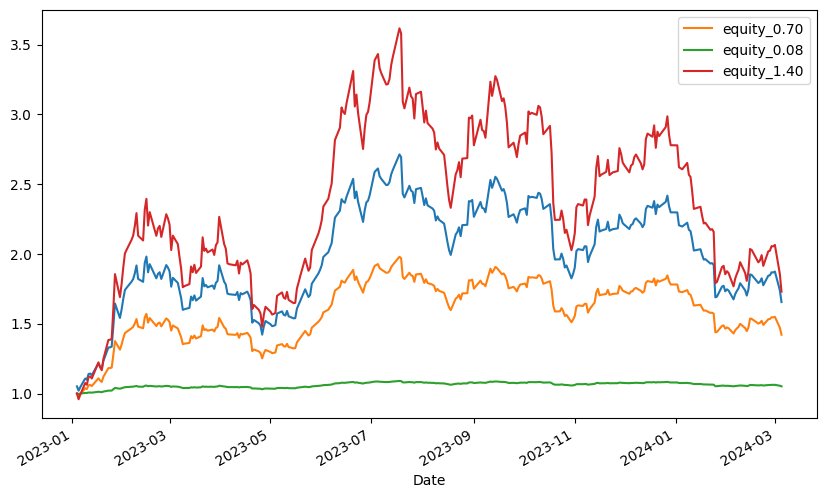

In [82]:
ax = data['return'].cumsum().apply(np.exp).plot(figsize=(10, 6))
data[equs].plot(ax=ax, legend=True);